<h1 align="center"> *Анализ социальных сетей* </h1>

# PZ-4.1 Centrality and Link Analysis

## Изучение функций модуля NetworkX, вычисляющих характеристики центральности графов (Centrality)

  
#### Функции, характеризующие отдельные вершины без учёта характеристик соседей
  
  Связность
  - degree_centrality()
  
  Близость
  - closeness_centrality(), harmonic_centrality()

  Посредничество
- betweenness_centrality()
- load_centrality()
- group_betweenness_centrality(), group_closeness_centrality(), group_degree_centrality() 

#### Функции, учитывающие характеристики прочих узлов 

- eigenvector_centrality(), katz_centrality()
- pagerank()
- voterank()
- hits() 

## Задание для подготовки к ПЗ-4.1:
- ознакомиться с указанными выше функциями, обратив особое внимание на исключения, возможные при вызове функций;
- как правило, функции вычисления центральностей вершин графа возвращают словарь в формате {имя вершины: значение центральности}. Продумать текст функции, возвращающей два словаря: вершины графа, имеющие максимальное значение и минимальное значение центральности.

## Задание на ПЗ-4.1

1. Сгенерировать и визуализировать граф florentine_families_graph.
Это набор данных об отношениях между известными флорентийскими семьями эпохи Возрождения,  собранных из исторических документов. Отношениями являются деловые связи (flobusiness - в частности, зарегистрированные финансовые связи, такие как займы, кредиты и совместные партнерства) и брачные союзы (flomarriage). По существу, эти данные включают семьи, которые были вовлечены в борьбу за политический контроль над городом Флоренцией около 1430 года. В этой борьбе доминировали две фракции: одна группировалась вокруг печально известного Медичи, другая - вокруг могущественного Строцци.

2. На данном графе применить указанные выше функции расчёта центральностей. Для каждой меры центральности построить две таблицы: вершины с максимальным значением, вершины с минимальным значением (точность 3 знака после запятой). Результаты сравнить с данными, представленными в графическом виде в статье "7 известных баз данных про социальные сети" (см. файл в папке).

3. По документации NetworkX изучите особенности использования функции closeness, определяемые параметрами,задаваемыми по умолчанию (разные формулы для расчёта меры близости).

4. Результаты работы представить в формате .ipynb. Имя файла: PZ-4.1[N].ipynb, где N - порядковый номер по журналу. 
В файле ОБЯЗАТЕЛЬНО должны присутствовать комментарии, поясняющие смысл действий, выполняемых в каждой ячейке.

In [85]:
import networkx as nx
from networkx.generators.social import florentine_families_graph as ffg
from networkx.algorithms.centrality import closeness_centrality as cc
import matplotlib.pyplot as pl
from itertools import combinations
from networkx.algorithms.centrality import degree_centrality as dc
from networkx.algorithms.centrality import harmonic_centrality as hc
from networkx.algorithms.centrality import closeness_centrality as cc
from networkx.algorithms.centrality import betweenness_centrality as bc
from networkx.algorithms.centrality import load_centrality as lc
from networkx.algorithms.centrality import group_betweenness_centrality as gbc
from networkx.algorithms.centrality import group_closeness_centrality as gcc
from networkx.algorithms.centrality import group_degree_centrality as gdc


def plot_graph(G, draw_type, weight_name=None):
    %matplotlib notebook
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, width=weights);
    else:
        if draw_type == "circular":
            nx.draw_circular(G)
        elif draw_type == "planar":
            nx.draw_circular(G)
        elif draw_type == "random":
            nx.draw_circular(G)
        elif draw_type == "spectral":
            nx.draw_circular(G)
        elif draw_type == "spring":
            nx.draw_circular(G)
        else:
            nx.draw_networkx(G, pos);

# 1 
Сгенерировать и визуализировать граф florentine_families_graph. Это набор данных об отношениях между известными флорентийскими семьями эпохи Возрождения, собранных из исторических документов. Отношениями являются деловые связи (flobusiness - в частности, зарегистрированные финансовые связи, такие как займы, кредиты и совместные партнерства) и брачные союзы (flomarriage). По существу, эти данные включают семьи, которые были вовлечены в борьбу за политический контроль над городом Флоренцией около 1430 года. В этой борьбе доминировали две фракции: одна группировалась вокруг печально известного Медичи, другая - вокруг могущественного Строцци.

<IPython.core.display.Javascript object>


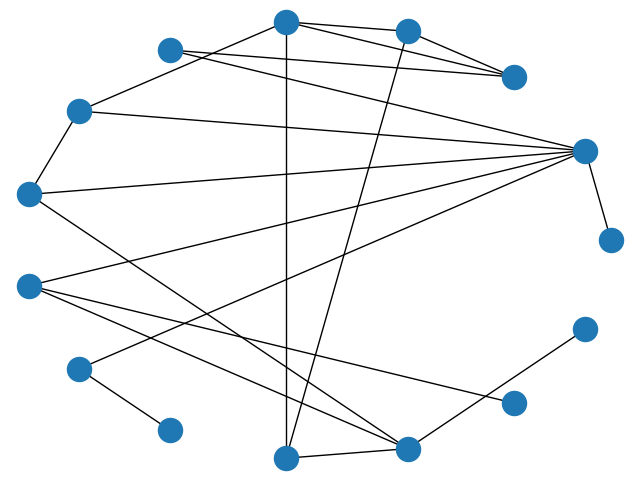

In [5]:
G = ffg()
plot_graph(G, "circular")

# 2
На данном графе применить указанные выше функции расчёта центральностей. Для каждой меры центральности построить две таблицы: вершины с максимальным значением, вершины с минимальным значением (точность 3 знака после запятой). Результаты сравнить с данными, представленными в графическом виде в статье "7 известных баз данных про социальные сети" (см. файл в папке).

In [74]:
def get_mm_centrality(function_centrality, G, S=None):
    centrality_dict = function_centrality(G) if S == None else function_centrality(G, S)
    if type(centrality_dict) == float:
        return centrality_dict
    max_val = max([x[1] for x in centrality_dict.items()])
    min_val = min([x[1] for x in centrality_dict.items()])
    return {
        "max": {key: round(val, 3) for key, val in centrality_dict.items() if val == max_val},
        "min": {key: round(val, 3) for key, val in centrality_dict.items() if val == min_val},
    }

In [57]:
print(get_mm_centrality(dc, G))

{'max': {'Medici': 0.429}, 'min': {'Acciaiuoli': 0.071, 'Pazzi': 0.071, 'Ginori': 0.071, 'Lamberteschi': 0.071}}


In [58]:
print(get_mm_centrality(cc, G))

{'max': {'Medici': 0.56}, 'min': {'Pazzi': 0.286}}


In [59]:
print(get_mm_centrality(hc, G))

{'max': {'Medici': 9.5}, 'min': {'Pazzi': 4.767}}


In [60]:
print(get_mm_centrality(bc, G))

{'max': {'Medici': 0.522}, 'min': {'Acciaiuoli': 0.0, 'Pazzi': 0.0, 'Ginori': 0.0, 'Lamberteschi': 0.0}}


In [61]:
print(get_mm_centrality(lc, G))

{'max': {'Medici': 0.522}, 'min': {'Acciaiuoli': 0.0, 'Pazzi': 0.0, 'Ginori': 0.0, 'Lamberteschi': 0.0}}


In [112]:
whole_list = list()
for counter in range(1, len(G.nodes())-1):
    for nodes_tuple in combinations(G.nodes(), counter):
        whole_list.append((get_mm_centrality(gbc, G, nodes_tuple), nodes_tuple,))
        
min_val = min(whole_list)[0]
max_val = max(whole_list)[0]
print(min_val)
for x in [x[1] for x in whole_list if x[0] == min_val]:
    print(x)
print(max_val)
for x in [x[1] for x in whole_list if x[0] == max_val]:
    print(x)

0.0
('Acciaiuoli',)
('Pazzi',)
('Ginori',)
('Lamberteschi',)
('Acciaiuoli', 'Pazzi')
('Acciaiuoli', 'Ginori')
('Acciaiuoli', 'Lamberteschi')
('Salviati', 'Pazzi')
('Pazzi', 'Ginori')
('Pazzi', 'Lamberteschi')
('Ginori', 'Lamberteschi')
('Acciaiuoli', 'Salviati', 'Pazzi')
('Acciaiuoli', 'Pazzi', 'Ginori')
('Acciaiuoli', 'Pazzi', 'Lamberteschi')
('Acciaiuoli', 'Ginori', 'Lamberteschi')
('Castellani', 'Peruzzi', 'Barbadori')
('Salviati', 'Pazzi', 'Ginori')
('Salviati', 'Pazzi', 'Lamberteschi')
('Pazzi', 'Ginori', 'Lamberteschi')
('Acciaiuoli', 'Castellani', 'Peruzzi', 'Barbadori')
('Acciaiuoli', 'Salviati', 'Pazzi', 'Ginori')
('Acciaiuoli', 'Salviati', 'Pazzi', 'Lamberteschi')
('Acciaiuoli', 'Pazzi', 'Ginori', 'Lamberteschi')
('Castellani', 'Peruzzi', 'Strozzi', 'Bischeri')
('Castellani', 'Peruzzi', 'Barbadori', 'Pazzi')
('Castellani', 'Peruzzi', 'Barbadori', 'Ginori')
('Castellani', 'Peruzzi', 'Barbadori', 'Lamberteschi')
('Salviati', 'Pazzi', 'Ginori', 'Lamberteschi')
('Acciaiuoli', 'Ca

In [114]:
whole_list = list()
for counter in range(1, len(G.nodes())-1):
    for nodes_tuple in combinations(G.nodes(), counter):
        whole_list.append((get_mm_centrality(gcc, G, nodes_tuple), nodes_tuple,))
        
min_val = min(whole_list)[0]
max_val = max(whole_list)[0]
print(min_val)
for x in [x[1] for x in whole_list if x[0] == min_val]:
    print(x)
print(max_val)
for x in [x[1] for x in whole_list if x[0] == max_val]:
    print(x)

0.2857142857142857
('Pazzi',)
1.0
('Medici', 'Castellani', 'Albizzi', 'Salviati', 'Guadagni')
('Medici', 'Castellani', 'Albizzi', 'Pazzi', 'Guadagni')
('Medici', 'Castellani', 'Salviati', 'Guadagni', 'Ginori')
('Medici', 'Castellani', 'Pazzi', 'Guadagni', 'Ginori')
('Medici', 'Peruzzi', 'Albizzi', 'Salviati', 'Guadagni')
('Medici', 'Peruzzi', 'Albizzi', 'Salviati', 'Lamberteschi')
('Medici', 'Peruzzi', 'Albizzi', 'Pazzi', 'Guadagni')
('Medici', 'Peruzzi', 'Albizzi', 'Pazzi', 'Lamberteschi')
('Medici', 'Peruzzi', 'Salviati', 'Guadagni', 'Ginori')
('Medici', 'Peruzzi', 'Salviati', 'Ginori', 'Lamberteschi')
('Medici', 'Peruzzi', 'Pazzi', 'Guadagni', 'Ginori')
('Medici', 'Peruzzi', 'Pazzi', 'Ginori', 'Lamberteschi')
('Medici', 'Strozzi', 'Albizzi', 'Salviati', 'Guadagni')
('Medici', 'Strozzi', 'Albizzi', 'Salviati', 'Lamberteschi')
('Medici', 'Strozzi', 'Albizzi', 'Pazzi', 'Guadagni')
('Medici', 'Strozzi', 'Albizzi', 'Pazzi', 'Lamberteschi')
('Medici', 'Strozzi', 'Salviati', 'Guadagni', 'G

('Acciaiuoli', 'Medici', 'Castellani', 'Barbadori', 'Albizzi', 'Salviati', 'Bischeri', 'Guadagni', 'Ginori')
('Acciaiuoli', 'Medici', 'Castellani', 'Barbadori', 'Albizzi', 'Salviati', 'Bischeri', 'Guadagni', 'Lamberteschi')
('Acciaiuoli', 'Medici', 'Castellani', 'Barbadori', 'Albizzi', 'Salviati', 'Bischeri', 'Ginori', 'Lamberteschi')
('Acciaiuoli', 'Medici', 'Castellani', 'Barbadori', 'Albizzi', 'Salviati', 'Guadagni', 'Ginori', 'Lamberteschi')
('Acciaiuoli', 'Medici', 'Castellani', 'Barbadori', 'Albizzi', 'Pazzi', 'Bischeri', 'Guadagni', 'Ginori')
('Acciaiuoli', 'Medici', 'Castellani', 'Barbadori', 'Albizzi', 'Pazzi', 'Bischeri', 'Guadagni', 'Lamberteschi')
('Acciaiuoli', 'Medici', 'Castellani', 'Barbadori', 'Albizzi', 'Pazzi', 'Bischeri', 'Ginori', 'Lamberteschi')
('Acciaiuoli', 'Medici', 'Castellani', 'Barbadori', 'Albizzi', 'Pazzi', 'Guadagni', 'Ginori', 'Lamberteschi')
('Acciaiuoli', 'Medici', 'Castellani', 'Barbadori', 'Salviati', 'Pazzi', 'Bischeri', 'Guadagni', 'Ginori')
('Acc

('Acciaiuoli', 'Castellani', 'Ridolfi', 'Tornabuoni', 'Albizzi', 'Pazzi', 'Bischeri', 'Guadagni', 'Ginori', 'Lamberteschi')
('Acciaiuoli', 'Castellani', 'Ridolfi', 'Tornabuoni', 'Salviati', 'Pazzi', 'Bischeri', 'Guadagni', 'Ginori', 'Lamberteschi')
('Acciaiuoli', 'Castellani', 'Ridolfi', 'Albizzi', 'Salviati', 'Pazzi', 'Bischeri', 'Guadagni', 'Ginori', 'Lamberteschi')
('Acciaiuoli', 'Castellani', 'Tornabuoni', 'Albizzi', 'Salviati', 'Pazzi', 'Bischeri', 'Guadagni', 'Ginori', 'Lamberteschi')
('Acciaiuoli', 'Peruzzi', 'Strozzi', 'Barbadori', 'Ridolfi', 'Tornabuoni', 'Albizzi', 'Salviati', 'Pazzi', 'Guadagni')
('Acciaiuoli', 'Peruzzi', 'Strozzi', 'Barbadori', 'Ridolfi', 'Tornabuoni', 'Albizzi', 'Salviati', 'Pazzi', 'Lamberteschi')
('Acciaiuoli', 'Peruzzi', 'Strozzi', 'Barbadori', 'Ridolfi', 'Tornabuoni', 'Albizzi', 'Salviati', 'Bischeri', 'Guadagni')
('Acciaiuoli', 'Peruzzi', 'Strozzi', 'Barbadori', 'Ridolfi', 'Tornabuoni', 'Albizzi', 'Salviati', 'Bischeri', 'Lamberteschi')
('Acciaiuoli',

In [113]:
whole_list = list()
for counter in range(1, len(G.nodes())-1):
    for nodes_tuple in combinations(G.nodes(), counter):
        whole_list.append((get_mm_centrality(gdc, G, nodes_tuple), nodes_tuple,))
        
min_val = min(whole_list)[0]
max_val = max(whole_list)[0]
print(min_val)
for x in [x[1] for x in whole_list if x[0] == min_val]:
    print(x)
print(max_val)
for x in [x[1] for x in whole_list if x[0] == max_val]:
    print(x)

0.07142857142857142
('Acciaiuoli',)
('Pazzi',)
('Ginori',)
('Lamberteschi',)
1.0
('Medici', 'Castellani', 'Albizzi', 'Salviati', 'Guadagni')
('Medici', 'Castellani', 'Albizzi', 'Pazzi', 'Guadagni')
('Medici', 'Castellani', 'Salviati', 'Guadagni', 'Ginori')
('Medici', 'Castellani', 'Pazzi', 'Guadagni', 'Ginori')
('Medici', 'Peruzzi', 'Albizzi', 'Salviati', 'Guadagni')
('Medici', 'Peruzzi', 'Albizzi', 'Salviati', 'Lamberteschi')
('Medici', 'Peruzzi', 'Albizzi', 'Pazzi', 'Guadagni')
('Medici', 'Peruzzi', 'Albizzi', 'Pazzi', 'Lamberteschi')
('Medici', 'Peruzzi', 'Salviati', 'Guadagni', 'Ginori')
('Medici', 'Peruzzi', 'Salviati', 'Ginori', 'Lamberteschi')
('Medici', 'Peruzzi', 'Pazzi', 'Guadagni', 'Ginori')
('Medici', 'Peruzzi', 'Pazzi', 'Ginori', 'Lamberteschi')
('Medici', 'Strozzi', 'Albizzi', 'Salviati', 'Guadagni')
('Medici', 'Strozzi', 'Albizzi', 'Salviati', 'Lamberteschi')
('Medici', 'Strozzi', 'Albizzi', 'Pazzi', 'Guadagni')
('Medici', 'Strozzi', 'Albizzi', 'Pazzi', 'Lamberteschi')
(

('Acciaiuoli', 'Medici', 'Peruzzi', 'Strozzi', 'Tornabuoni', 'Albizzi', 'Salviati', 'Guadagni', 'Lamberteschi')
('Acciaiuoli', 'Medici', 'Peruzzi', 'Strozzi', 'Tornabuoni', 'Albizzi', 'Salviati', 'Ginori', 'Lamberteschi')
('Acciaiuoli', 'Medici', 'Peruzzi', 'Strozzi', 'Tornabuoni', 'Albizzi', 'Pazzi', 'Bischeri', 'Guadagni')
('Acciaiuoli', 'Medici', 'Peruzzi', 'Strozzi', 'Tornabuoni', 'Albizzi', 'Pazzi', 'Bischeri', 'Lamberteschi')
('Acciaiuoli', 'Medici', 'Peruzzi', 'Strozzi', 'Tornabuoni', 'Albizzi', 'Pazzi', 'Guadagni', 'Ginori')
('Acciaiuoli', 'Medici', 'Peruzzi', 'Strozzi', 'Tornabuoni', 'Albizzi', 'Pazzi', 'Guadagni', 'Lamberteschi')
('Acciaiuoli', 'Medici', 'Peruzzi', 'Strozzi', 'Tornabuoni', 'Albizzi', 'Pazzi', 'Ginori', 'Lamberteschi')
('Acciaiuoli', 'Medici', 'Peruzzi', 'Strozzi', 'Tornabuoni', 'Salviati', 'Pazzi', 'Guadagni', 'Ginori')
('Acciaiuoli', 'Medici', 'Peruzzi', 'Strozzi', 'Tornabuoni', 'Salviati', 'Pazzi', 'Ginori', 'Lamberteschi')
('Acciaiuoli', 'Medici', 'Peruzzi

('Medici', 'Castellani', 'Peruzzi', 'Strozzi', 'Barbadori', 'Ridolfi', 'Tornabuoni', 'Albizzi', 'Salviati', 'Guadagni')
('Medici', 'Castellani', 'Peruzzi', 'Strozzi', 'Barbadori', 'Ridolfi', 'Tornabuoni', 'Albizzi', 'Salviati', 'Lamberteschi')
('Medici', 'Castellani', 'Peruzzi', 'Strozzi', 'Barbadori', 'Ridolfi', 'Tornabuoni', 'Albizzi', 'Pazzi', 'Guadagni')
('Medici', 'Castellani', 'Peruzzi', 'Strozzi', 'Barbadori', 'Ridolfi', 'Tornabuoni', 'Albizzi', 'Pazzi', 'Lamberteschi')
('Medici', 'Castellani', 'Peruzzi', 'Strozzi', 'Barbadori', 'Ridolfi', 'Tornabuoni', 'Salviati', 'Guadagni', 'Ginori')
('Medici', 'Castellani', 'Peruzzi', 'Strozzi', 'Barbadori', 'Ridolfi', 'Tornabuoni', 'Salviati', 'Ginori', 'Lamberteschi')
('Medici', 'Castellani', 'Peruzzi', 'Strozzi', 'Barbadori', 'Ridolfi', 'Tornabuoni', 'Pazzi', 'Guadagni', 'Ginori')
('Medici', 'Castellani', 'Peruzzi', 'Strozzi', 'Barbadori', 'Ridolfi', 'Tornabuoni', 'Pazzi', 'Ginori', 'Lamberteschi')
('Medici', 'Castellani', 'Peruzzi', 'Str

# 3
По документации NetworkX изучите особенности использования функции closeness, определяемые параметрами,задаваемыми по умолчанию (разные формулы для расчёта меры близости).

In [26]:
cc(G)

{'Acciaiuoli': 0.3684210526315789,
 'Medici': 0.56,
 'Castellani': 0.3888888888888889,
 'Peruzzi': 0.3684210526315789,
 'Strozzi': 0.4375,
 'Barbadori': 0.4375,
 'Ridolfi': 0.5,
 'Tornabuoni': 0.4827586206896552,
 'Albizzi': 0.4827586206896552,
 'Salviati': 0.3888888888888889,
 'Pazzi': 0.2857142857142857,
 'Bischeri': 0.4,
 'Guadagni': 0.4666666666666667,
 'Ginori': 0.3333333333333333,
 'Lamberteschi': 0.32558139534883723}

In [27]:
cc(G, "Medici")

0.56

In [42]:
cc(G, distance=2)

{'Acciaiuoli': 0.3684210526315789,
 'Medici': 0.56,
 'Castellani': 0.3888888888888889,
 'Peruzzi': 0.3684210526315789,
 'Strozzi': 0.4375,
 'Barbadori': 0.4375,
 'Ridolfi': 0.5,
 'Tornabuoni': 0.4827586206896552,
 'Albizzi': 0.4827586206896552,
 'Salviati': 0.3888888888888889,
 'Pazzi': 0.2857142857142857,
 'Bischeri': 0.4,
 'Guadagni': 0.4666666666666667,
 'Ginori': 0.3333333333333333,
 'Lamberteschi': 0.32558139534883723}

In [41]:
cc_t = cc(G, wf_improved=True)
cc_f = cc(G, wf_improved=False)
{key: val for key, val in cc_f.items() if cc_t[key] != val}

{}